In [1]:
!pip install pandas
!pip install fix_yahoo_finance
!pip install pandas-datareader
!pip install matplotlib

import datetime
import pandas as pd
import numpy as np
import fix_yahoo_finance as yf
import pandas_datareader as pdr
import matplotlib.pyplot as plt

In [22]:
#Get yahoo finance data and returns it in a DF

def get_yahoo_finance_data(tickers, startdate, enddate, units=None):

    yahoo_finance_data = pd.DataFrame()    
    if units==None: units = [1] * len(tickers)
    
    for ticker, unit in zip(tickers, units):
        #print(ticker)
        temp = pdr.DataReader(ticker, 'yahoo', startdate, enddate)
        temp['ticker']=[ticker]*temp.shape[0]        
        temp[['High','Low','Open','Close','Adj Close']] = temp[['High','Low','Open','Close','Adj Close']].mul(unit)
        
        if yahoo_finance_data.empty:
            yahoo_finance_data = temp
        else:
            yahoo_finance_data = pd.concat([temp,yahoo_finance_data])
            
    return(yahoo_finance_data)

In [68]:
#my portfolio

#dict_portfolio ={"ticker": ["RDSB.L","SMT.L", "VOD.L"],
#                "units": [121,966, 1437],
#                 "currency" : ["pGBP","pGBP","pGBP"]}

dict_portfolio ={"ticker": ["VOD.L","ITV.L", "BLND.L", "IE00B50W2R13.IR", "0P0000SAVS.L", "0P0000KSPA.L"],
                 "asset_name": ["Vodafone","ITV", "British Land", "Vanguard Global Bond","Vanguard UK All Share", "Vanguard US Equity"],
                 "units": [1437,1207, 417, 32.9, 72.9524, 31.0345],
                 "currency" : ["pGBP","pGBP","pGBP","GBP","GBP","GBP"]}

df_portfolio = pd.DataFrame.from_dict(dict_portfolio)

#Get yahoo data for my portfolio

startdate = '2018/01/01'
enddate = '2019/06/01'
portfolio_yahoo_data = get_yahoo_finance_data(dict_portfolio['ticker'],startdate,enddate,dict_portfolio['units'])
portfolio_yahoo_data_total = portfolio_yahoo_data.groupby(['Date']).sum()
portfolio_yahoo_data_total['ticker']='My Portfolio'
portfolio_yahoo_data_total.tail()

,High,Low,Open,Close,Volume,Adj Close,ticker
Date,,,,,,,
2019-05-21,582248.721487,573610.578161,579268.391485,577420.125441,100174108.0,577420.125441,My Portfolio
2019-05-22,578961.928353,567405.508004,577588.054498,569986.380288,130876794.0,569986.380288,My Portfolio
2019-05-23,568717.705188,555700.149485,566662.611766,560603.980006,132360535.0,560603.980006,My Portfolio
2019-05-24,556132.613183,545193.232911,549418.445107,549378.551080,93812038.0,549378.551080,My Portfolio
2019-05-28,540289.824738,529691.575005,535352.448158,534158.142105,108590019.0,534158.142105,My Portfolio


In [58]:
#Get Yahoo Finance data for FTSE100 and ouput to CSV

ftse_tickers = pd.read_csv('FTSE100_tickers.csv')
ftse_yahoo_data = get_yahoo_finance_data(ftse_tickers['Ticker'], startdate,enddate)
ftse_yahoo_data.to_csv('ftse_yahoo_data.csv')
ftse_yahoo_data.tail()

,High,Low,Open,Close,Volume,Adj Close,ticker
Date,,,,,,,
2019-05-21,1083.5,1062.000000,1076.5,1068.0,1658628.0,1068.0,III.L
2019-05-22,1079.0,1065.500000,1072.0,1070.0,2087933.0,1070.0,III.L
2019-05-23,1066.5,1037.500000,1065.0,1047.5,2267853.0,1047.5,III.L
2019-05-24,1064.5,1047.500000,1047.5,1059.0,1989266.0,1059.0,III.L
2019-05-28,1075.0,1062.007446,1067.5,1070.5,711110.0,1070.5,III.L


In [69]:
#Get Yahoo Finance data for Sector Funds and ouput to CSV

sector_tickers = pd.read_csv('sector_tickers.csv')
sector_yahoo_data = get_yahoo_finance_data(sector_tickers['Ticker'], startdate,enddate)
sector_yahoo_data.to_csv('sector_yahoo_data.csv')
sector_yahoo_data.tail()

RemoteDataError: No data fetched for symbol GLDAX.LW using YahooDailyReader

In [63]:
#Combine Portfolio and FTSE Yahoo Finance data
ftse_yahoo_data = pd.read_csv('ftse_yahoo_data.csv', index_col='Date')
df = pd.concat([portfolio_yahoo_data_total, ftse_yahoo_data], sort=True)

In [64]:
# create_correlation matrix

corr_matrix = df[['ticker','Adj Close']].pivot(columns='ticker', values='Adj Close').corr()
corr_matrix.head()

ticker,AAL.L,ABF.L,ADM.L,AHT.L,ANTO.L,AUTO.L,AV.L,AZN.L,BA.L,BARC.L,...,STJ.L,SVT.L,TSCO.L,TUI.L,TW.L,ULVR.L,UU.L,VOD.L,WPP.L,WTB.L
ticker,,,,,,,,,,,,,,,,,,,,,
AAL.L,1.000000,0.562486,0.872824,0.592972,0.920088,0.529965,0.675026,0.543756,0.050844,0.605266,...,0.526945,0.451322,0.729130,-0.707958,0.831005,0.391840,0.478603,-0.325679,0.044906,0.248461
ABF.L,0.562486,1.000000,0.518928,0.672943,0.320044,0.848866,0.746344,-0.057424,0.194585,0.336142,...,0.804999,0.110204,0.849552,-0.331965,0.683468,0.781481,-0.006412,-0.501376,0.667295,-0.349591
ADM.L,0.872824,0.518928,1.000000,0.719895,0.847694,0.440161,0.773836,0.411548,0.213949,0.700604,...,0.466179,0.571163,0.725197,-0.564137,0.834453,0.294711,0.598047,-0.266798,0.050716,0.237835
AHT.L,0.592972,0.672943,0.719895,1.000000,0.505064,0.540236,0.919365,-0.005501,0.344570,0.584634,...,0.583216,0.355890,0.797275,-0.297460,0.716693,0.450618,0.333192,-0.476740,0.535887,-0.201212
ANTO.L,0.920088,0.320044,0.847694,0.505064,1.000000,0.321841,0.574000,0.635303,-0.004980,0.686869,...,0.361754,0.587648,0.602737,-0.620348,0.758723,0.147764,0.652718,-0.116064,-0.132498,0.419131


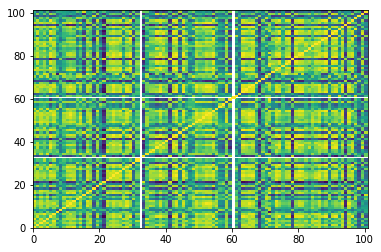

In [66]:
fig =  plt.figure()
ax = fig.add_subplot(1,1,1)
heatmap = ax.pcolor(corr_matrix.values)

In [114]:
#recommend uncorrelated assets
asset_recommendations = ftse_correlation[['My Portfolio']]
asset_recommendations[(asset_recommendations['My Portfolio']<0.01)&(asset_recommendations['My Portfolio']>-0.01)]


ticker,My Portfolio
ticker,
CCL.L,0.005378
CRDA.L,0.007053
LGEN.L,0.000753
SLA.L,0.007858


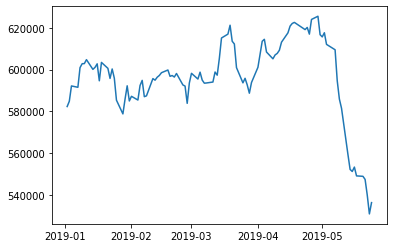

In [107]:
portfolio_plot = df[df['ticker']=='My Portfolio']
plt.plot(portfolio_plot['Adj Close'])

In [23]:
ftse_correlation

NameError: name 'ftse_correlation' is not defined

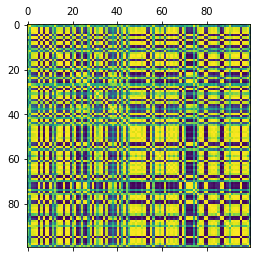

<Figure size 108000x108000 with 0 Axes>

In [35]:
plt.matshow(ftse_correlation.corr())
plt.show()

In [10]:
portfolio = pdr.get_data_yahoo(df_portfolio.iloc[0,1]) * df_portfolio.iloc[0,2] * 0.01
print(portfolio.loc['2019-04-18','Close'])

for asset, unit, currency in zip(df_portfolio.asset_id[1:], df_portfolio.units[1:], df_portfolio.currency[1:]):
    if currency == "GBP": 
        multiple = 1
    else:
        multiple = 0.01
    temp = multiple * pdr.get_data_yahoo(asset) * unit
    #print(asset, (pdr.get_data_yahoo(asset).Close * unit * multiple).tail(1))
    portfolio += temp
    print(portfolio.loc['2019-04-18','Close'])

2048.587164916992
3742.008201751709
6225.660099945068
11208.134575042724
26418.929268603515
41303.416613223264


In [17]:
startdate = '2019/05/01'
portfolio = get_yahoo_finance_data(dict_portfolio['ticker'], startdate)

VOD.L
ITV.L
BLND.L


In [18]:
portfolio.tail()

,High,Low,Open,Close,Volume,Adj Close,ticker
Date,,,,,,,
2019-05-01,597.799988,594.000000,596.799988,597.599976,2007668,597.599976,BLND.L
2019-05-02,607.400024,593.200012,593.400024,603.000000,2950569,603.000000,BLND.L
2019-05-03,602.200012,595.000000,602.200012,595.200012,2812754,595.200012,BLND.L
2019-05-07,604.200012,595.400024,596.200012,598.200012,2536422,598.200012,BLND.L
2019-05-08,597.400024,585.400024,596.200012,585.400024,2471733,585.400024,BLND.L
2019-05-09,587.200012,579.000000,584.200012,584.000000,2737359,584.000000,BLND.L
2019-05-10,579.200012,561.400024,575.000000,570.000000,4382903,570.000000,BLND.L
2019-05-13,570.799988,561.799988,567.400024,563.599976,3739546,563.599976,BLND.L
2019-05-14,565.599976,559.599976,564.799988,560.400024,3273757,560.400024,BLND.L


In [25]:
new_asset = pdr.get_data_yahoo("TCG.L")
asset_corr(portfolio,new_asset)

-0.18721160696042002

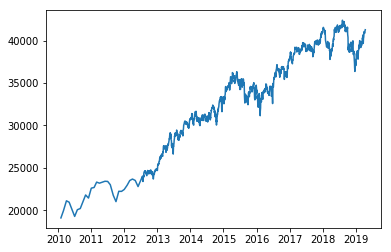

In [14]:
plt.plot(portfolio.Close.dropna())

In [1]:
#data = yf.download("VOD ITV.L", start="2018-11-01", end="2018-12-15")
data = yf.download("VOD.L ITV.L BLND.L", start="2018-01-01", end="2019-01-01")
data.Close.corr()

NameError: name 'yf' is not defined

In [108]:

import fix_yahoo_finance as yf
yf.pdr_override()

# download dataframe
#BLND.L VOD.L ITV.L
stock1 = pdr.get_data_yahoo("VOD.L")
stock2 = pdr.get_data_yahoo("ITV.L")
stock3 = pdr.get_data_yahoo("BLND.L")
print(stock1.shape)
print(stock2.shape)

(2366, 6)
(2366, 6)


In [109]:
asset_corr(stock1, stock2)

0.871460296298292

In [21]:
#returns correlation between 2 assets
def asset_corr(asset1, asset2):
    data = pd.concat([asset1['Adj Close'], asset2['Adj Close']],axis=1)
    data.dropna(inplace = True)
    correlation = data.corr()
    return(correlation.iloc[0,1])    

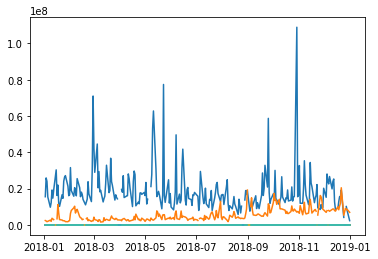

In [82]:
plt.plot(data)

In [7]:
vod = yf.Ticker("VOD.l")
gbond = yf.Ticker("IE00B50W2R13.IR")
vod.info # get stock info
hist = vod.history(period="max") # get historical market data
vod.actions # show actions (dividends, splits)
vod.dividends # show dividends
vod.splits # show splits

Date
1994-07-21    2.000000
1999-10-01    4.000000
2006-07-31    0.875000
2014-02-24    0.545455
Name: Stock Splits, dtype: float64

In [5]:
df_portfolio_info = pd.DataFrame.from_dict(vod.info, orient='index').T
df_portfolio_info.append(pd.DataFrame.from_dict(gbond.info, orient='index').T, sort=True).T

,0,0
ask,124.2,NaN
askSize,0,NaN
averageDailyVolume10Day,129894150,0
averageDailyVolume3Month,89002797,0
bid,124.16,NaN
bidSize,0,NaN
bookValue,2.564,NaN
currency,GBp,GBp
earningsTimestamp,1557819000,NaN
epsForward,0.1,NaN


In [6]:
#my portfolio
vod_price = pdr.get_data_yahoo("VOD.L")
vod_units = 1437
itv_price = pdr.get_data_yahoo("ITV.L")
itv_units = 1207
blnd_price = pdr.get_data_yahoo("BLND.L")
blnd_units = 417
vggbond_price = pdr.get_data_yahoo("IE00B50W2R13.IR")
vggbond_units = 32.9
vguk_price = pdr.get_data_yahoo("0P0000SAVS.L")
vguk_units = 72.9524
vgus_price = pdr.get_data_yahoo("0P0000KSPA.L")
vgus_units = 31.0345

In [7]:
vod_value = vod_price * vod_units 
itv_value = itv_price * itv_units 
blnd_value = blnd_price * blnd_units 
(vod_value + itv_value + blnd_value).tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-13,581563.334297,557891.302979,578967.258339,559331.651749,2.787469e+11,559331.651749
2019-05-14,569888.186661,548334.633766,557998.396751,552226.186760,2.904632e+11,552226.186760
2019-05-15,557378.882629,542613.508690,555355.272110,551237.456932,2.153164e+11,551237.456932
2019-05-16,556486.364380,544602.948509,549582.047630,553342.234741,1.929182e+11,553342.234741
2019-05-17,552782.668526,543657.275169,550608.160088,549124.548065,1.075812e+11,549124.548065
